In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train[0].min(),x_train[0].max()

(0, 255)

In [ ]:
x_train= (x_train-0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)
x_train[0].min(),x_train[0].max()

(0.0, 1.0)

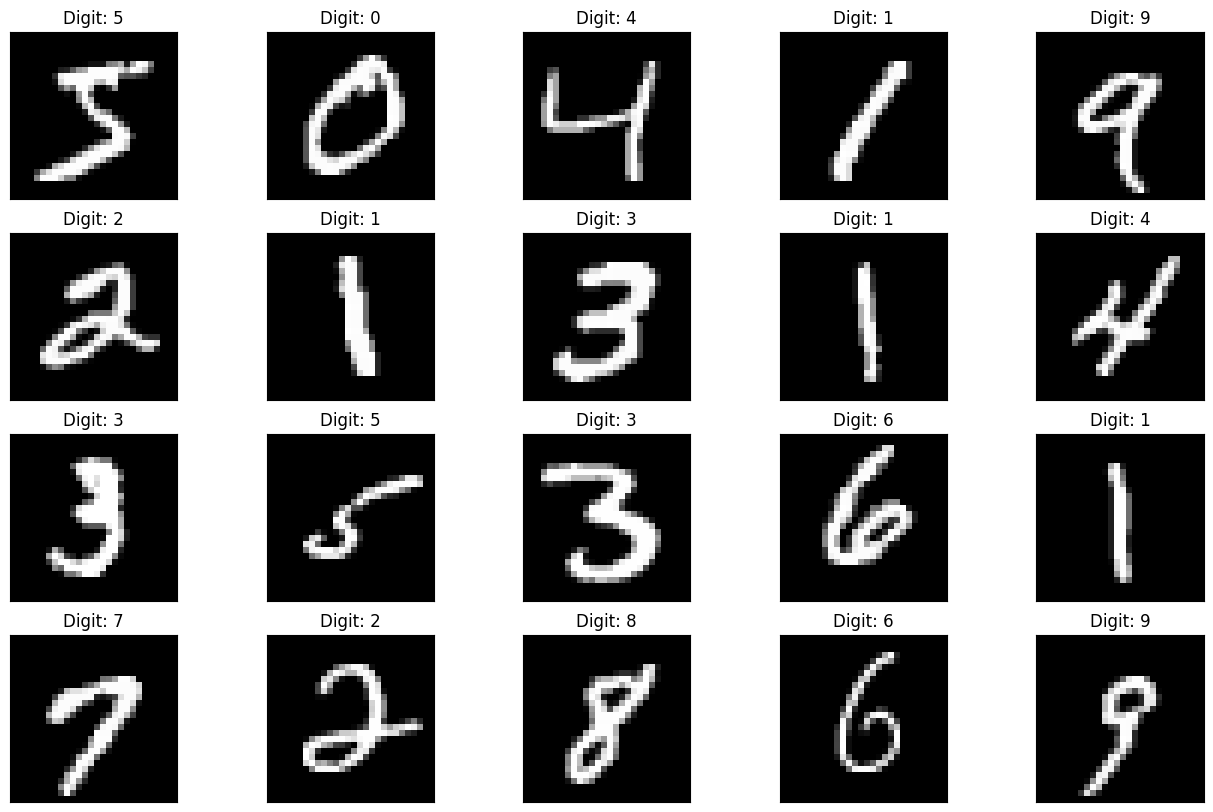

In [ ]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
plt.show()

In [ ]:
x_train = x_train.reshape((x_train.shape + (1,)))
x_test = x_test.reshape((x_test.shape + (1,)))

In [ ]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [ ]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2333 - accuracy: 0.9295
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0763 - accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0360 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0270 - accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0200 - accuracy: 0.9936
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0151 - accuracy: 0.9954
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0105 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 18s 9ms/step -

1/1 [==============================] - 0s 15ms/step


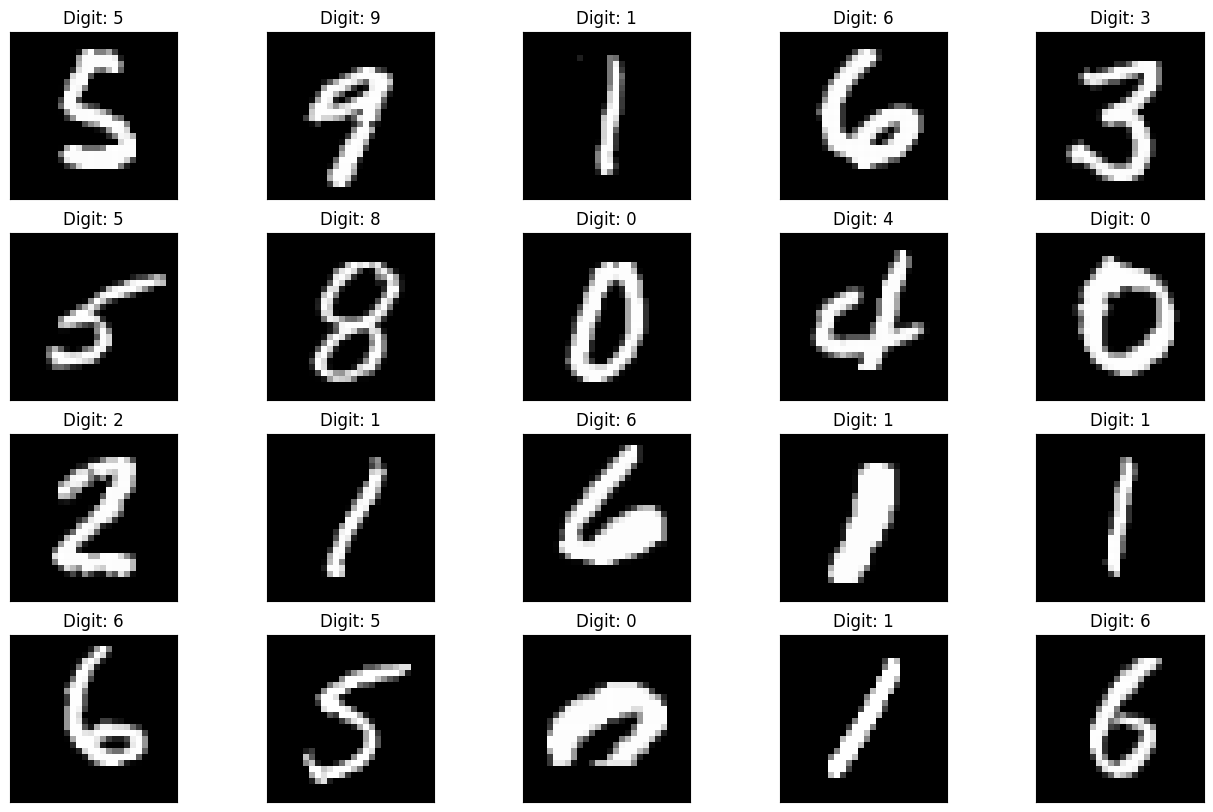

In [ ]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 4ms/step


0.9869

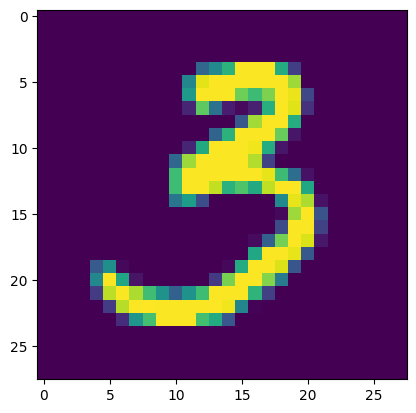

In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [ ]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))


313/313 [==============================] - 1s 3ms/step
Handwritten number in the image is= 3


In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042067334055900574
Test accuracy: 0.9868999719619751
